<a href="https://colab.research.google.com/github/rohanjaiswal2001/ISL-Player-Stats/blob/main/Comparing_ISL_Goalkeepers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import all required libraries

In [12]:
# Data Manipulation libraries:
import io
import pandas as pd
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler

# Plotting libraries:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Import required data

This code is to import and read a csv file stored in your local system

In [13]:
isl_df = pd.read_csv('isl_player_final.csv')
isl_df.head()

,tour_id,tour_name,id,jersey_no,name,short_name,position_id,position,position_short,team_id,team_name,team_short_name,is_started,is_onbench,is_goalkeeper,is_substitute,minutes_played,bonus_points,injury_minutes_played,actual_minutes_played,goaltenders,events.goals,events.own_goals,events.assists,events.key_passes,events.chances_created,events.shots,events.shots_on_target,events.shots_off_target,events.fouls_committed,events.fouls_suffered,events.yellow_cards,events.red_cards,events.is_second_yellow_card,events.offsides,events.corner_kicks,events.crosses,events.free_kicks,events.throw_in,events.punches,events.catches,events.goals_conceded,...,events.blocked_shots,events.defensive_blocked_shots,events.penalty_kicks.total,events.penalty_kicks.goals,touches.total,touches.total_passes,touches.good_passes,touches.bad_passes,touches.interceptions,touches.blocks,touches.tackles,touches.successful_tackles,touches.unsuccessful_tackles,touches.clearance,touches.saves,touches.take_on_total,touches.take_on_successful,touches.take_on_unsuccessful,touches.last_man_tackle_successful,touches.last_man_tackle_unsuccessful,touches.successful_passes,touches.interceptions_won,touches.aerial_duel.total,touches.aerial_duel.won,touches.aerial_duel.lost,touches.ground_duel.total,touches.ground_duel.won,touches.ground_duel.lost,goaltenders.shots_faced,goaltenders.shots_on_goal_faced,goaltenders.goals_allowed,goaltenders.saves,goaltenders.catches,goaltenders.punches,goaltenders.penalty_kicks.shots_faced,goaltenders.penalty_kicks.goals_allowed,goaltenders.penalty_kicks.saves,country_id,country_name,dob,player_foot,height
0,148,ISL6,1514,3,Asamoah Gyan,Asamoah Gyan,2,Forward,FWD,504,NorthEast United FC,NEUFC,8,4,0,4,592,0,21,613,0,4,0,1,9,10,18,9,9,9,18,2,0,0,6,0,2,2,0,0,0,6,...,0,0,1,1,252,175,90,85,5,3,5,2,3,11,0,3,0,2,0,0,0,0,36,22,14,1,1,0,0,0,0,0,0,0,0,0,0,43,Ghana,NaN,NaN,NaN
1,148,ISL6,2475,26,Deshorn Dwayne Brown,Deshorn Brown,2,Forward,FWD,656,Bengaluru FC,BFC,6,7,0,7,379,0,6,385,0,3,0,0,3,3,19,8,10,7,5,2,0,0,3,0,3,0,0,0,0,2,...,1,0,0,0,135,91,49,42,1,2,8,5,3,4,0,17,8,4,0,0,0,0,10,1,9,0,0,0,0,0,0,0,0,0,0,0,0,56,Jamaica,12/22/1990,Right,187.0
2,148,ISL6,2900,9,Amine Chermiti,Amine Chermiti,2,Forward,FWD,506,Mumbai City FC,MCFC,16,6,0,5,1352,0,47,1415,0,6,0,0,16,16,22,10,11,31,26,4,0,0,20,0,13,3,0,0,0,11,...,1,0,0,0,391,291,162,129,6,6,26,5,21,15,0,14,0,3,0,0,0,0,22,10,12,0,0,0,0,0,0,0,0,0,0,0,0,106,Tunisia,12/26/1987,left,177.0
3,148,ISL6,3753,7,Francisco Medina Luna,Piti,3,Midfielder,MF,1159,Jamshedpur FC,JFC,6,5,0,5,416,0,0,421,0,1,0,2,7,9,16,7,6,6,19,1,0,0,0,14,10,22,0,0,0,2,...,3,0,1,1,247,207,133,74,5,5,9,4,5,0,0,19,11,4,0,0,0,0,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,19,Spain,5/26/1981,left,179.0
4,148,ISL6,3809,4,Rafael Lopez Gomez,Rafael Lopez Gomez,1,Defender,DEF,1536,Hyderabad FC,HFC,6,5,0,4,395,0,21,410,0,0,0,0,3,3,2,0,2,6,6,0,0,0,0,0,0,4,3,0,0,2,...,0,0,0,0,217,141,111,30,8,11,30,7,23,16,0,17,2,0,0,0,0,0,5,3,2,0,0,0,0,0,0,0,0,0,0,0,0,19,Spain,4/9/1985,right,183.0


In [14]:
# Checking all the unique positions in the data:
isl_df.drop_duplicates(subset=["position_id"])[["position_id", "position"]]

,position_id,position
0,2,Forward
3,3,Midfielder
4,1,Defender
9,4,Goalkeeper


In [15]:
# Slice (Filter) dataframe only to retain information about GKs:
isl_df[isl_df["position_id"] == 4]

,tour_id,tour_name,id,jersey_no,name,short_name,position_id,position,position_short,team_id,team_name,team_short_name,is_started,is_onbench,is_goalkeeper,is_substitute,minutes_played,bonus_points,injury_minutes_played,actual_minutes_played,goaltenders,events.goals,events.own_goals,events.assists,events.key_passes,events.chances_created,events.shots,events.shots_on_target,events.shots_off_target,events.fouls_committed,events.fouls_suffered,events.yellow_cards,events.red_cards,events.is_second_yellow_card,events.offsides,events.corner_kicks,events.crosses,events.free_kicks,events.throw_in,events.punches,events.catches,events.goals_conceded,...,events.blocked_shots,events.defensive_blocked_shots,events.penalty_kicks.total,events.penalty_kicks.goals,touches.total,touches.total_passes,touches.good_passes,touches.bad_passes,touches.interceptions,touches.blocks,touches.tackles,touches.successful_tackles,touches.unsuccessful_tackles,touches.clearance,touches.saves,touches.take_on_total,touches.take_on_successful,touches.take_on_unsuccessful,touches.last_man_tackle_successful,touches.last_man_tackle_unsuccessful,touches.successful_passes,touches.interceptions_won,touches.aerial_duel.total,touches.aerial_duel.won,touches.aerial_duel.lost,touches.ground_duel.total,touches.ground_duel.won,touches.ground_duel.lost,goaltenders.shots_faced,goaltenders.shots_on_goal_faced,goaltenders.goals_allowed,goaltenders.saves,goaltenders.catches,goaltenders.punches,goaltenders.penalty_kicks.shots_faced,goaltenders.penalty_kicks.goals_allowed,goaltenders.penalty_kicks.saves,country_id,country_name,dob,player_foot,height
9,148,ISL6,3997,1,Amrinder Ranjit Singh,Amrinder Singh,4,Goalkeeper,GK,506,Mumbai City FC,MCFC,18,0,18,0,1620,0,89,1725,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,62,0,24,34,18,...,0,0,0,0,601,261,167,94,0,0,0,0,0,55,49,26,0,0,0,0,0,0,1,1,0,0,0,0,165,69,29,42,30,0,3,3,0,1,India,5/27/1993,Right,183.0
22,148,ISL6,9770,13,Francisco Ramos Dorronsoro Sanchez,Francisco Dorronsoro,4,Goalkeeper,GK,1499,Odisha FC,OFC,10,7,10,1,879,0,42,926,0,0,0,0,0,0,0,0,0,2,3,4,0,0,0,0,0,18,1,9,31,17,...,0,0,0,0,340,142,107,35,1,1,0,0,0,33,23,20,3,0,0,0,0,0,0,0,0,0,0,0,87,34,17,22,29,0,6,4,1,19,Spain,5/22/1985,NaN,180.0
24,148,ISL6,10254,33,Laxmikant Kattimani,Laxmikant Kattimani,4,Goalkeeper,GK,1536,Hyderabad FC,HFC,6,12,6,0,540,0,26,571,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,8,0,8,25,21,...,0,0,0,0,193,62,44,18,1,0,0,0,0,16,24,6,0,0,0,0,0,0,0,0,0,0,0,0,71,37,13,24,25,0,2,2,0,1,India,5/3/1989,Right,183.0
33,148,ISL6,10649,24,Subhasish Roy Chowdhury,Subhasish Roy,4,Goalkeeper,GK,504,NorthEast United FC,NEUFC,15,1,15,0,1350,0,72,1431,0,0,0,0,1,1,0,0,0,1,1,5,0,0,0,0,0,32,0,28,43,21,...,0,0,0,0,453,139,77,62,1,0,0,0,0,31,57,22,0,0,0,0,0,0,0,0,0,0,0,0,165,76,21,55,42,0,3,2,1,1,India,9/27/1986,Right,186.0
37,148,ISL6,10677,40,Kunzang Bhutia,Kunzang Bhutia,4,Goalkeeper,GK,1536,Hyderabad FC,HFC,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,India,1/3/1994,Right,186.0
38,148,ISL6,10682,13,Tumbirumbu Paramba Rehenesh,TP Rehenesh,4,Goalkeeper,GK,498,Kerala Blasters FC,KBFC,13,0,13,0,1170,0,63,1247,0,0,0,0,1,1,0,0,0,0,2,0,0,0,0,0,0,40,0,6,25,18,...,0,0,0,0,448,228,180,48,0,0,1,0,1,41,23,41,2,0,0,0,0,0,0,0,0,0,0,0,88,47,25,23,20,0,4,4,0,1,India,2/13/1993,Right,178.0
48,148,ISL6,10717,29,Arindam Bhattacharja,Arindam Bhattacharja,4,Goalkeeper,GK,499,ATK FC,ATKFC,20,1,20,0,1800,0,91,1918,0,0,0,0,0,0,0,0,0,0,4,3,0,0,0,0,0,53,0,35,38,12,...,0,0,0,0,548,152,70,82,0,0,0,0,0,45,53,30,0,0,0,0,0,0,0,0,0,0,0,0,194,70,17,53,37,0,2,2,0,1,India,5/20/1989,Right,189.0
49,148,ISL6,10767,1,Subrata Paul,Subrata Paul,4,Goalkeeper,GK,1159,Jamshedpur FC,JFC,15,3,15,0,1350,0,77,1438,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,23,0,16,41,19,...,0,0,0,0,389,147,104,43,0,0,0,0,0,31,52,15,0,0,0,0,0,0,0,0,0,0,0,0,141,70,26,44,38,0,3,3,0,1,India,12/24/1986,Right,185.0
52,148,ISL6,13366,1,Karanjit Singh,Karanjit Singh,4,Goalkeeper,GK,5

In [16]:
# Save the sliced dataframe in a variable for further use:
gk_df = deepcopy(isl_df[isl_df["position_id"] == 4])

In [17]:
gk_df.columns.values

array(['tour_id', 'tour_name', 'id', 'jersey_no', 'name', 'short_name',
       'position_id', 'position', 'position_short', 'team_id',
       'team_name', 'team_short_name', 'is_started', 'is_onbench',
       'is_goalkeeper', 'is_substitute', 'minutes_played', 'bonus_points',
       'injury_minutes_played', 'actual_minutes_played', 'goaltenders',
       'events.goals', 'events.own_goals', 'events.assists',
       'events.key_passes', 'events.chances_created', 'events.shots',
       'events.shots_on_target', 'events.shots_off_target',
       'events.fouls_committed', 'events.fouls_suffered',
       'events.yellow_cards', 'events.red_cards',
       'events.is_second_yellow_card', 'events.offsides',
       'events.corner_kicks', 'events.crosses', 'events.free_kicks',
       'events.throw_in', 'events.punches', 'events.catches',
       'events.goals_conceded', 'events.clean_sheet', 'events.cleansheet',
       'events.fantasy_assists', 'events.penalties_saved',
       'events.penalties_earn

In [18]:

gk_df.describe().round(1)

,tour_id,id,jersey_no,position_id,team_id,is_started,is_onbench,is_goalkeeper,is_substitute,minutes_played,bonus_points,injury_minutes_played,actual_minutes_played,goaltenders,events.goals,events.own_goals,events.assists,events.key_passes,events.chances_created,events.shots,events.shots_on_target,events.shots_off_target,events.fouls_committed,events.fouls_suffered,events.yellow_cards,events.red_cards,events.is_second_yellow_card,events.offsides,events.corner_kicks,events.crosses,events.free_kicks,events.throw_in,events.punches,events.catches,events.goals_conceded,events.clean_sheet,events.cleansheet,events.fantasy_assists,events.penalties_saved,events.penalties_earned,events.penalties_conceded,events.penalties_missed,events.freekicks_conceded_goal,events.freekicks_earned_goal,events.blocked_shots,events.defensive_blocked_shots,events.penalty_kicks.total,events.penalty_kicks.goals,touches.total,touches.total_passes,touches.good_passes,touches.bad_passes,touches.interceptions,touches.blocks,touches.tackles,touches.successful_tackles,touches.unsuccessful_tackles,touches.clearance,touches.saves,touches.take_on_total,touches.take_on_successful,touches.take_on_unsuccessful,touches.last_man_tackle_successful,touches.last_man_tackle_unsuccessful,touches.successful_passes,touches.interceptions_won,touches.aerial_duel.total,touches.aerial_duel.won,touches.aerial_duel.lost,touches.ground_duel.total,touches.ground_duel.won,touches.ground_duel.lost,goaltenders.shots_faced,goaltenders.shots_on_goal_faced,goaltenders.goals_allowed,goaltenders.saves,goaltenders.catches,goaltenders.punches,goaltenders.penalty_kicks.shots_faced,goaltenders.penalty_kicks.goals_allowed,goaltenders.penalty_kicks.saves,country_id,height
count,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,43.0
mean,178.2,30083.8,19.7,4.0,891.1,7.1,7.3,7.3,0.3,641.7,0.0,40.1,684.3,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.3,1.5,0.6,0.0,0.0,0.0,0.0,0.0,16.4,0.0,12.2,15.4,9.9,0.0,3.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,217.8,86.1,53.2,32.9,0.1,0.3,0.4,0.1,0.3,16.6,19.3,5.7,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.9,28.5,10.0,18.8,14.5,0.0,1.3,1.1,0.2,1.3,145.0
std,27.0,22744.9,15.9,0.0,471.7,8.0,6.9,8.0,0.4,719.8,0.0,46.0,767.9,0.0,0.0,0.2,0.2,0.6,0.6,0.0,0.0,0.0,0.6,2.0,1.2,0.1,0.0,0.0,0.0,0.0,21.5,0.1,15.4,17.0,9.9,0.0,2.9,0.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.5,104.0,67.2,40.9,0.4,0.6,0.7,0.4,0.6,20.2,22.4,11.4,0.5,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.1,0.0,72.8,31.8,10.9,21.8,16.3,0.0,1.9,1.5,0.5,2.3,75.6
min,148.0,3997.0,1.0,4.0,496.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,148.0,13366.0,1.0,4.0,504.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,176.0
50%,202.0,26757.0,23.0,4.0,656.0,3.0,5.0,3.0,0.0,218.0,0.0,14.0,231.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,6.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,21.0,14.0,9.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,9.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,182.0
75%,202.0,35262.0,31.0,4.0,1329.0,14.5,13.5,15.0,0.5,1297.5,0.0,80.0,13

In [19]:
# We will set display max columns to 85 since we have 83 columns in our gk_df:
pd.set_option("display.max_columns", 85)

In [20]:

gk_df.describe().round(1)

,tour_id,id,jersey_no,position_id,team_id,is_started,is_onbench,is_goalkeeper,is_substitute,minutes_played,bonus_points,injury_minutes_played,actual_minutes_played,goaltenders,events.goals,events.own_goals,events.assists,events.key_passes,events.chances_created,events.shots,events.shots_on_target,events.shots_off_target,events.fouls_committed,events.fouls_suffered,events.yellow_cards,events.red_cards,events.is_second_yellow_card,events.offsides,events.corner_kicks,events.crosses,events.free_kicks,events.throw_in,events.punches,events.catches,events.goals_conceded,events.clean_sheet,events.cleansheet,events.fantasy_assists,events.penalties_saved,events.penalties_earned,events.penalties_conceded,events.penalties_missed,events.freekicks_conceded_goal,events.freekicks_earned_goal,events.blocked_shots,events.defensive_blocked_shots,events.penalty_kicks.total,events.penalty_kicks.goals,touches.total,touches.total_passes,touches.good_passes,touches.bad_passes,touches.interceptions,touches.blocks,touches.tackles,touches.successful_tackles,touches.unsuccessful_tackles,touches.clearance,touches.saves,touches.take_on_total,touches.take_on_successful,touches.take_on_unsuccessful,touches.last_man_tackle_successful,touches.last_man_tackle_unsuccessful,touches.successful_passes,touches.interceptions_won,touches.aerial_duel.total,touches.aerial_duel.won,touches.aerial_duel.lost,touches.ground_duel.total,touches.ground_duel.won,touches.ground_duel.lost,goaltenders.shots_faced,goaltenders.shots_on_goal_faced,goaltenders.goals_allowed,goaltenders.saves,goaltenders.catches,goaltenders.punches,goaltenders.penalty_kicks.shots_faced,goaltenders.penalty_kicks.goals_allowed,goaltenders.penalty_kicks.saves,country_id,height
count,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,43.0
mean,178.2,30083.8,19.7,4.0,891.1,7.1,7.3,7.3,0.3,641.7,0.0,40.1,684.3,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.3,1.5,0.6,0.0,0.0,0.0,0.0,0.0,16.4,0.0,12.2,15.4,9.9,0.0,3.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,217.8,86.1,53.2,32.9,0.1,0.3,0.4,0.1,0.3,16.6,19.3,5.7,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.9,28.5,10.0,18.8,14.5,0.0,1.3,1.1,0.2,1.3,145.0
std,27.0,22744.9,15.9,0.0,471.7,8.0,6.9,8.0,0.4,719.8,0.0,46.0,767.9,0.0,0.0,0.2,0.2,0.6,0.6,0.0,0.0,0.0,0.6,2.0,1.2,0.1,0.0,0.0,0.0,0.0,21.5,0.1,15.4,17.0,9.9,0.0,2.9,0.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.5,104.0,67.2,40.9,0.4,0.6,0.7,0.4,0.6,20.2,22.4,11.4,0.5,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.1,0.0,72.8,31.8,10.9,21.8,16.3,0.0,1.9,1.5,0.5,2.3,75.6
min,148.0,3997.0,1.0,4.0,496.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,148.0,13366.0,1.0,4.0,504.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,176.0
50%,202.0,26757.0,23.0,4.0,656.0,3.0,5.0,3.0,0.0,218.0,0.0,14.0,231.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,6.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,21.0,14.0,9.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,9.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,182.0
75%,202.0,35262.0,31.0,4.0,1329.0,14.5,13.5,15.0,0.5,1297.5,0.0,80.0,13

#### Cleansheets per season

For this exploration, we will use, both, a numerical and a graphical approach
1. Numerical --> using [`groupby()`](https://pandas.pydata.org/docs/user_guide/groupby.html)
1. Graphical --> using [`seaborn.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html) and [`px.bar`](https://plotly.com/python-api-reference/generated/plotly.express.bar)

In [21]:
# Numerical exploration:
gk_df.groupby(["short_name", "tour_name"])["events.cleansheet"].sum()

short_name              tour_name
Aditya Patra            ISL6          1
Albino Gomes            ISL7          3
Amrinder Singh          ISL6          2
                        ISL7         10
Ankit Bhuyan            ISL6          0
Arindam Bhattacharja    ISL6          7
                        ISL7         10
Arshdeep Singh          ISL6          3
                        ISL7          1
Avilash Paul            ISL7          8
Bilal Husain Khan       ISL6          2
                        ISL7          0
Debjit Majumder         ISL7          3
Dheeraj Singh           ISL6          7
                        ISL7          4
Francisco Dorronsoro    ISL6          2
Gurmeet                 ISL7          6
Gurpreet Singh Sandhu   ISL6          7
                        ISL7          4
Kamaljit Singh          ISL6          0
                        ISL7          1
Karanjit Singh          ISL6          2
                        ISL7          6
Kunzang Bhutia          ISL6          0
Lalbia

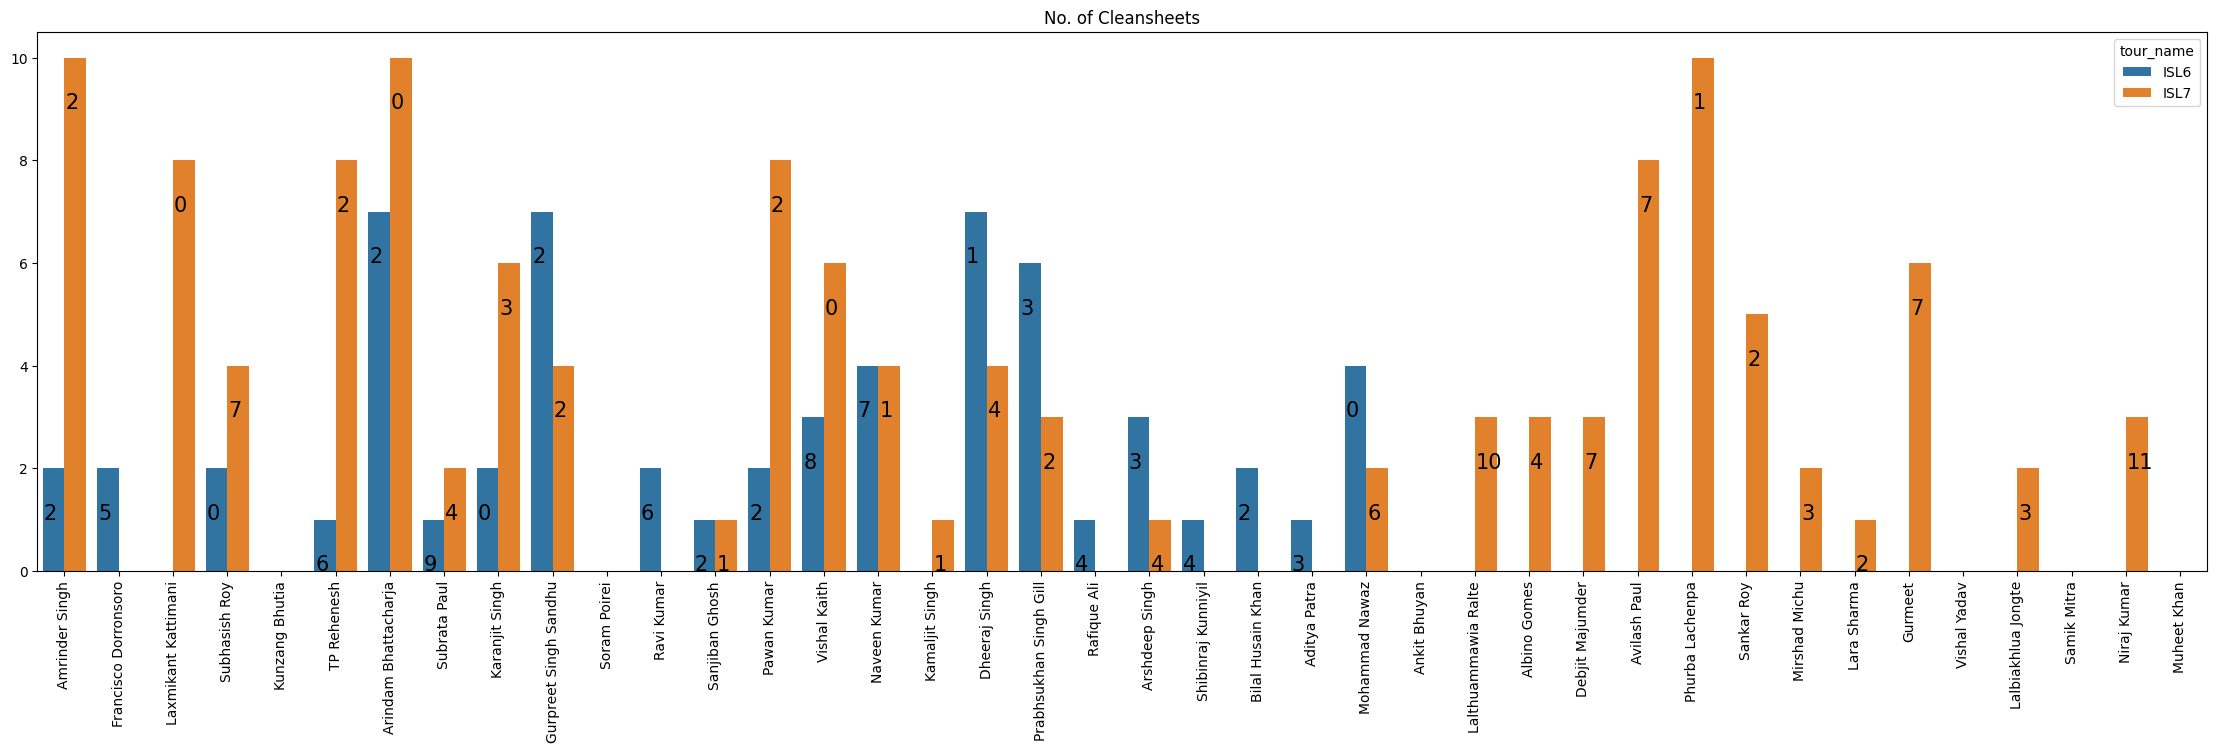

In [22]:
# Using seaborn:
plt.figure(figsize=(28, 7))
ax = sns.barplot(x="short_name", y="events.cleansheet", hue="tour_name", data=gk_df)
plt.xticks(rotation=90)
plt.title("No. of Cleansheets")
plt.ylabel("")
plt.xlabel("")
# adding labels to the bars:
for p, label in zip(ax.patches, isl_df["events.cleansheet"].values):
    ax.annotate(label, (p.get_x() + 0.02, p.get_height() - 1), size=15)

In [23]:
# Using plotly.express:
fig = px.bar(x="short_name", y="events.cleansheet", barmode="group", data_frame=gk_df,
             color="tour_name", text="events.cleansheet", title="No. of Cleansheets (per season)",
             labels={"short_name": "", "events.cleansheet": "", "tour_name": "tour"})
fig.update_traces(textfont={"color": "white"})

#### Slice the dataframe w.r.t. minutes criteria

In [24]:
# Again slice the GK dataframe to include players who have played more than 180 mins in a season:
gk_df_mins_df = deepcopy(gk_df[gk_df["actual_minutes_played"] > 180])

#### Goals Conceded per season vs minutes played

In this part, we will have a look at goals conceded first. However, looking only at this might be biased since every GK will have played for a different amount of time. So, we will compare it with minutes played.

In [25]:
# Plotting goals conceded per season:
fig = px.bar(x="short_name", y="events.goals_conceded", data_frame=gk_df_mins_df,
             color="tour_name", text="events.goals_conceded", barmode="group",
             title="Total Goals Conceded (per season)",
             labels={"short_name": "", "events.goals_conceded": "", "tour_name": "tour"})
fig.update_traces(textfont={"color": "white"})

In [26]:
# Plotting minutes played per season:
fig = px.bar(x="short_name", y="actual_minutes_played", data_frame=gk_df_mins_df,
             color="tour_name", text="actual_minutes_played", barmode="group",
             title="Total Minutes Played (per season)",
             labels={"short_name": "", "actual_minutes_played": "", "tour_name": "tour"})
fig.update_traces(textfont={"color": "white"})

#### Goals Conceded vs mins played using subplots

In [27]:
# Create an empty subplot:
fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=("Goals Conceded (per season)","Mins Played (per season)"))
# Add bar plot for goals conceded in 1st subplot:
fig.add_trace(go.Bar(x=gk_df_mins_df["short_name"],
                     y=gk_df_mins_df["events.goals_conceded"],
                     text=gk_df_mins_df["events.goals_conceded"],
                     textposition="inside",
                     name="Total Conceded"),
              row=1, col=1)
# Add bar plot for minutes played in 2nd subplot:
fig.add_trace(go.Bar(x=gk_df_mins_df["short_name"],
                     y=gk_df_mins_df["actual_minutes_played"],
                     text=gk_df_mins_df["actual_minutes_played"],
                     textposition="inside",
                     insidetextfont={"color": "white"},
                     name="Total Minutes"),
              row=2, col=1)
# Additional plot parameters:
fig.update_layout(height=600, width=1500,
                  showlegend=True)
fig.show()

#### Punches vs Catches

ratio of catches as compared to punches for each GK

In [28]:
# considering players who have played atleast 900 mins (equivalent of 10 matches):
gk_df_mins_df = deepcopy(gk_df_mins_df[gk_df_mins_df["actual_minutes_played"] > 180])

In [29]:
# Simple punches vs catches:
fig = px.scatter(y="events.catches", x="events.punches", data_frame=gk_df_mins_df,
                 hover_name="team_short_name", text="short_name", symbol="tour_name",
                 labels={"events.catches": "Catches", "events.punches": "Punches", "tour_name": "tour"},
                 opacity=.8)

fig.add_trace(go.Scatter(x=gk_df_mins_df["events.punches"],
                         y=[gk_df_mins_df["events.catches"].mean()]*len(gk_df_mins_df),
                         name="Avg. catches"))
fig.add_trace(go.Scatter(x=[gk_df_mins_df["events.punches"].mean()]*len(gk_df_mins_df),
                         y=gk_df_mins_df["events.catches"],
                         name="Avg. punches"))
# Right top quadrant:
fig.add_annotation(x=gk_df_mins_df["events.punches"].describe(percentiles=[.9])["90%"],
                   y=gk_df_mins_df["events.catches"].describe(percentiles=[.9])["90%"],
            text="High Punch-Catch Zone",
            showarrow=False, yshift=50, font={"size": 20})

fig.add_annotation(x=gk_df_mins_df["events.punches"].describe(percentiles=[.9])["90%"],
                   y=gk_df_mins_df["events.catches"].describe(percentiles=[.10])["10%"],
            text="High Punch Low Catch Zone",
            showarrow=False, font={"size": 20})
# Left bottom quadrant:
fig.add_annotation(x=gk_df_mins_df["events.punches"].describe(percentiles=[.15])["15%"],
                   y=gk_df_mins_df["events.catches"].describe(percentiles=[.10])["10%"],
            text="Low Punch-Catch Zone",
            showarrow=False, font={"size": 20})
# Left top quadrant:
fig.add_annotation(x=gk_df_mins_df["events.punches"].describe(percentiles=[.15])["15%"],
                   y=gk_df_mins_df["events.catches"].describe(percentiles=[.9])["90%"],
            text="Low Punch High Catch Zone",
            showarrow=False, yshift=50, font={"size": 20})
# Additional plot parameters:
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1500)

##### Per90 comparison

In [30]:
# Create per 90 stats:
gk_df_mins_df["events.catchesPer90"] = gk_df_mins_df["events.catches"].divide(gk_df_mins_df["actual_minutes_played"]).multiply(90)
gk_df_mins_df["events.punchesPer90"] = gk_df_mins_df["events.punches"].divide(gk_df_mins_df["actual_minutes_played"]).multiply(90)

In [31]:
x_col = "events.punchesPer90"
y_col = "events.catchesPer90"
hoverName = "team_short_name"
markerLabelText = "short_name"
markerSymbol="tour_name"

In [32]:
# Simple punches vs catches per 90:
fig = px.scatter(y=y_col, x=x_col, data_frame=gk_df_mins_df,
                 hover_name=hoverName, text=markerLabelText, symbol=markerSymbol,
                 labels={y_col: "Catches", x_col: "Punches", markerSymbol: "tour"},
                 opacity=.8)

fig.add_trace(go.Scatter(x=gk_df_mins_df[x_col],
                         y=[gk_df_mins_df[y_col].mean()]*len(gk_df_mins_df),
                         name="Avg. catches"))
fig.add_trace(go.Scatter(x=[gk_df_mins_df[x_col].mean()]*len(gk_df_mins_df),
                         y=gk_df_mins_df[y_col],
                         name="Avg. punches"))
# Right top quadrant:
fig.add_annotation(x=gk_df_mins_df[x_col].max(),
                   y=gk_df_mins_df[y_col].max(),
            text="High Punch-Catch Zone",
            showarrow=False, xshift=-150, yshift=-50, font={"size": 20})

fig.add_annotation(x=gk_df_mins_df[x_col].max(),
                   y=gk_df_mins_df[y_col].min(),
            text="High Punch Low Catch Zone",
            showarrow=False, xshift=-150, font={"size": 20})
# Left bottom quadrant:
fig.add_annotation(x=gk_df_mins_df[x_col].min(),
                   y=gk_df_mins_df[y_col].min(),
            text="Low Punch-Catch Zone",
            showarrow=False, xshift=150, font={"size": 20})
# Left top quadrant:
fig.add_annotation(x=gk_df_mins_df[x_col].min(),
                   y=gk_df_mins_df[y_col].max(),
            text="Low Punch High Catch Zone",
            showarrow=False, xshift=150, yshift=-50, font={"size": 20})
# Additional plot parameters:
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1500)

##### Per90 comparison with other metrics

In this, I will use metrics like SavesPer90, CleansheetsPer90 to infuse additional information into a single graph

In [33]:
# Calculate per90 stats:
gk_df_mins_df["goaltenders.savesPer90"] = gk_df_mins_df["goaltenders.saves"].divide(gk_df_mins_df["actual_minutes_played"]).multiply(90)
gk_df_mins_df["events.cleansheetPer90"] = gk_df_mins_df["events.cleansheet"].divide(gk_df_mins_df["actual_minutes_played"]).multiply(90)

In [34]:
# Assign column names to variables for ease of modification:
markerSize = "goaltenders.savesPer90"
markerColor = "events.cleansheetPer90"

In [35]:
# Punches vs catches with saves and cleansheets:
fig = px.scatter(y=y_col, x=x_col, data_frame=gk_df_mins_df,
                 size=markerSize, color=markerColor, opacity=.8,
                 hover_name=hoverName, text=markerLabelText, symbol=markerSymbol,
                 labels={y_col: "Catches", x_col: "Punches", markerSymbol: "tour"})
# Add average lines for punches and catches:
fig.add_trace(go.Scatter(x=gk_df_mins_df[x_col],
                         y=[gk_df_mins_df[y_col].mean()]*len(gk_df_mins_df),
                         name="Avg. catches"))
fig.add_trace(go.Scatter(x=[gk_df_mins_df[x_col].mean()]*len(gk_df_mins_df),
                         y=gk_df_mins_df[y_col],
                         name="Avg. punches"))
# Annotations for each quadrant
# Right top quadrant #
fig.add_annotation(x=gk_df_mins_df[x_col].max(),
                   y=gk_df_mins_df[y_col].max(),
            text="High Punch-Catch Zone",
            showarrow=False, xshift=-150, yshift=-50, font={"size": 20})
# Right bottom quadrant #
fig.add_annotation(x=gk_df_mins_df[x_col].max(),
                   y=gk_df_mins_df[y_col].min(),
            text="High Punch Low Catch Zone",
            showarrow=False, xshift=-150, font={"size": 20})
# Left bottom quadrant #
fig.add_annotation(x=gk_df_mins_df[x_col].min(),
                   y=gk_df_mins_df[y_col].min(),
            text="Low Punch-Catch Zone",
            showarrow=False, xshift=150, font={"size": 20})
# Left top quadrant #
fig.add_annotation(x=gk_df_mins_df[x_col].min(),
                   y=gk_df_mins_df[y_col].max(),
            text="Low Punch High Catch Zone",
            showarrow=False, xshift=150, yshift=-50, font={"size": 20})
# Additional plot parameters:
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=False, height=800, width=1500)

fig.show()

### Comparison Analysis - Radar Plots

Comparing more than two metrics in a given graph using Radar graphs in this section.

In [36]:
# To check the difference in values for goaltenders and events catches:
gk_df_mins_df.groupby("id").agg({"short_name": "first", 'goaltenders.catches': "sum", 'events.catches': 'sum'})

,short_name,goaltenders.catches,events.catches
id,,,
3997,Amrinder Singh,60,66
9770,Francisco Dorronsoro,29,31
10254,Laxmikant Kattimani,48,48
10649,Subhasish Roy,79,83
10682,TP Rehenesh,51,55
10717,Arindam Bhattacharja,76,78
10767,Subrata Paul,54,57
13370,Gurpreet Singh Sandhu,91,96
19153,Albino Gomes,46,48


In [37]:

gk_df_mins_df.columns.values

array(['tour_id', 'tour_name', 'id', 'jersey_no', 'name', 'short_name',
       'position_id', 'position', 'position_short', 'team_id',
       'team_name', 'team_short_name', 'is_started', 'is_onbench',
       'is_goalkeeper', 'is_substitute', 'minutes_played', 'bonus_points',
       'injury_minutes_played', 'actual_minutes_played', 'goaltenders',
       'events.goals', 'events.own_goals', 'events.assists',
       'events.key_passes', 'events.chances_created', 'events.shots',
       'events.shots_on_target', 'events.shots_off_target',
       'events.fouls_committed', 'events.fouls_suffered',
       'events.yellow_cards', 'events.red_cards',
       'events.is_second_yellow_card', 'events.offsides',
       'events.corner_kicks', 'events.crosses', 'events.free_kicks',
       'events.throw_in', 'events.punches', 'events.catches',
       'events.goals_conceded', 'events.clean_sheet', 'events.cleansheet',
       'events.fantasy_assists', 'events.penalties_saved',
       'events.penalties_earn

In [38]:
per90Cols = ['actual_minutes_played', 'events.punches', 'events.catches', 'events.goals_conceded', 'events.cleansheet',
             'touches.total', 'goaltenders.shots_faced', 'goaltenders.goals_allowed', 'goaltenders.saves', 'goaltenders.catches']

In [39]:
id_names_df = gk_df_mins_df.groupby(["id"]).agg({"short_name": "first"})
radar_cols_df = gk_df_mins_df.groupby(["id"])[per90Cols].sum()

In [40]:
final_df_for_radar = pd.concat([id_names_df, radar_cols_df], axis=1)
final_df_for_radar.reset_index(inplace=True)

In [41]:
final_df_for_radar.columns

Index(['id', 'short_name', 'actual_minutes_played', 'events.punches',
       'events.catches', 'events.goals_conceded', 'events.cleansheet',
       'touches.total', 'goaltenders.shots_faced', 'goaltenders.goals_allowed',
       'goaltenders.saves', 'goaltenders.catches'],
      dtype='object')

In [42]:
per90Cols.remove('actual_minutes_played')

In [43]:
for col in per90Cols:
    final_df_for_radar[col + "Per90"] = final_df_for_radar[col].divide(final_df_for_radar["actual_minutes_played"]).multiply(90)

In [44]:
cols_for_radar = [i + "Per90" for i in per90Cols]
print(cols_for_radar)

['events.punchesPer90', 'events.catchesPer90', 'events.goals_concededPer90', 'events.cleansheetPer90', 'touches.totalPer90', 'goaltenders.shots_facedPer90', 'goaltenders.goals_allowedPer90', 'goaltenders.savesPer90', 'goaltenders.catchesPer90']


#### Normalization of values between 0 and 1 for uniformity in Radar Plots

In [45]:
scaler = MinMaxScaler()
final_df_for_radar[cols_for_radar] = scaler.fit_transform(final_df_for_radar[cols_for_radar])

In [46]:
isl_max = final_df_for_radar[cols_for_radar].max().max()
print(isl_max)

1.0


In [47]:
final_df_for_radar[final_df_for_radar["short_name"].str.contains("Arindam")]

,id,short_name,actual_minutes_played,events.punches,events.catches,events.goals_conceded,events.cleansheet,touches.total,goaltenders.shots_faced,goaltenders.goals_allowed,goaltenders.saves,goaltenders.catches,events.punchesPer90,events.catchesPer90,events.goals_concededPer90,events.cleansheetPer90,touches.totalPer90,goaltenders.shots_facedPer90,goaltenders.goals_allowedPer90,goaltenders.savesPer90,goaltenders.catchesPer90
5,10717,Arindam Bhattacharja,4132,83,78,31,17,1071,392,36,112,76,0.726298,0.31177,0.015104,0.258487,0.099423,0.420185,0.073002,0.49095,0.321707


In [48]:
player_id = 10717  # Used a variable here so that we can pick any player we want and get the plot for that player.
player_name = final_df_for_radar.loc[(final_df_for_radar["id"] == player_id), "short_name"].item()
fig = px.line_polar(final_df_for_radar,
                    r=final_df_for_radar.loc[(final_df_for_radar["id"] == player_id), cols_for_radar].values.flatten(),
                    theta=cols_for_radar, line_close=True)
fig.update_traces(fill='toself')
    # Additional properties for the plot:
fig.update_layout(
    title=player_name,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, isl_max]
            )),
            showlegend=True)
fig.show()

In [49]:
# Player id of Arindam Bhattacharja (change this to your desired GK to be compared with)
id_for_comparison = 10717
player_name_for_comparison = final_df_for_radar.loc[final_df_for_radar["id"] == id_for_comparison, "short_name"].item()

In [50]:
for i, row in final_df_for_radar.iterrows():
    if row["id"] == id_for_comparison:
        continue
    print(row["short_name"])
    # Initiate the plotly go figure
    fig = go.Figure()
    # Add Radar plots for different players:
    fig.add_trace(go.Scatterpolar(
        r=final_df_for_radar.loc[final_df_for_radar["id"] == id_for_comparison, cols_for_radar].values.flatten(),
        theta=cols_for_radar,
        fill='toself',
        name=player_name_for_comparison))
    fig.add_trace(go.Scatterpolar(
        r=row[cols_for_radar].values.flatten(),
        theta=cols_for_radar,
        fill='toself',
        name=row["short_name"]))
    # Additional properties for the plot:
    fig.update_layout(
        title=player_name_for_comparison + " vs " + row["short_name"],
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[0, isl_max]
        )),
    showlegend=True
    )
    fig.show()

Amrinder Singh


Francisco Dorronsoro


Laxmikant Kattimani


Subhasish Roy


TP Rehenesh


Subrata Paul


Gurpreet Singh Sandhu


Albino Gomes


Debjit Majumder


Vishal Kaith


Naveen Kumar


Kamaljit Singh


Dheeraj Singh


Rafique Ali


Arshdeep Singh


Bilal Husain Khan


Mohammad Nawaz


Gurmeet
